In [143]:
# Imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
from scipy.stats import t
import community 
import community.community_louvain as community_louvain

In [129]:
# requirements.txt
# pandas==2.0.3
# networkx==3.1
# matplotlib==3.7.5
# seaborn==0.13.2
# numpy==1.24.3
# scikit-learn==1.3.2
# scipy==1.10.1
# community==1.0.0b1  
# python-louvain==0.16    

# Part 3: Post Feature Engineering EDA

In [67]:
processed_dir = os.path.join( "..", "data", "processed")
final_dataset_path = os.path.join(processed_dir, 'FEData_For_Modelling.parquet')

# Read the multi-part Parquet dataset
data = pd.read_parquet(final_dataset_path).reset_index(drop = True)
data.head(4000)


,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh
0,AAB1302,38,41,10,38,28,23,37,142,0,1,10,0,0,0,40,81,246
1,AAB1762,32,39,18,18,33,0,194,654,0,9,14,0,0,4,0,243,679
2,AAC0904,31,30,36,18,28,0,0,0,0,22,144,0,5,34,0,499,4025
3,AAC1033,42,40,40,22,29,0,0,0,0,14,72,0,0,1,0,1,2
4,AAC1489,24,13,42,24,38,0,0,0,0,1,175,0,0,2,0,101,5058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZRF1980,43,41,26,16,30,0,9,1272,0,16,298,0,0,11,0,28,494
1996,ZUR1449,31,42,12,36,17,0,0,0,0,1,7,0,65,296,0,293,1322
1997,ZVW1475,38,35,18,24,37,0,0,0,0,0,1,0,0,0,0,2,7
1998,ZWS0755,45,47,42,39,28,0,0,0,0,58,266,0,0,0,0,148,810


In [68]:
malicious_filenames = answers_dir = os.path.join( "..", "data", "raw_external", 'answers', 'r5.2-2')
malicious_users = []

for filename in malicious_filenames:
    malicious_users.append(filename.replace('r5.2-2-', "").replace('.csv', ""))

malicious_users

['MDS0680',
 'GWG0497',
 'CKP0630',
 'HMS1658',
 'BYO1846',
 'HXP0976',
 'CIF1430',
 'ITA0159',
 'OSS1463',
 'SNK1280',
 'HIS1394',
 'SIS0042',
 'HSN0675',
 'MCP0611',
 'TNB1616',
 'CHP1711',
 'MGB1235',
 'NAH1366',
 'JAL0811',
 'OKM1092',
 'TMT0851',
 'DCC1119',
 'KSS1005',
 'VCF1602',
 'RRS0056',
 'WDT1634',
 'ICB1354',
 'ZIE0741',
 'LVF1626',
 'TRC1838']

In [69]:
data['malicious'] = np.where(data['user'].isin(malicious_users), 1, 0)
data

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh,malicious
0,AAB1302,38,41,10,38,28,23,37,142,0,1,10,0,0,0,40,81,246,0
1,AAB1762,32,39,18,18,33,0,194,654,0,9,14,0,0,4,0,243,679,0
2,AAC0904,31,30,36,18,28,0,0,0,0,22,144,0,5,34,0,499,4025,0
3,AAC1033,42,40,40,22,29,0,0,0,0,14,72,0,0,1,0,1,2,0
4,AAC1489,24,13,42,24,38,0,0,0,0,1,175,0,0,2,0,101,5058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZRF1980,43,41,26,16,30,0,9,1272,0,16,298,0,0,11,0,28,494,0
1996,ZUR1449,31,42,12,36,17,0,0,0,0,1,7,0,65,296,0,293,1322,0
1997,ZVW1475,38,35,18,24,37,0,0,0,0,0,1,0,0,0,0,2,7,0
1998,ZWS0755,45,47,42,39,28,0,0,0,0,58,266,0,0,0,0,148,810,0


### 3.1 Data Quality Check
#### 3.1.1 General Overview

In [8]:
print(f'Shape of dataset: {data.shape} \n'
      f'Columns of dataset: {data.columns}')

Shape of dataset: (2000, 19) 
Columns of dataset: Index(['user', 'O', 'C', 'E', 'A', 'N', 'FCwke', 'FCowh', 'FCwh', 'SDwke',
       'SDowh', 'SDwh', 'CDwke', 'CDowh', 'CDwh', 'JDwke', 'JDowh', 'JDwh',
       'malicious'],
      dtype='object')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       2000 non-null   string
 1   O          2000 non-null   int8  
 2   C          2000 non-null   int8  
 3   E          2000 non-null   int8  
 4   A          2000 non-null   int8  
 5   N          2000 non-null   int8  
 6   FCwke      2000 non-null   int16 
 7   FCowh      2000 non-null   int16 
 8   FCwh       2000 non-null   int16 
 9   SDwke      2000 non-null   int16 
 10  SDowh      2000 non-null   int16 
 11  SDwh       2000 non-null   int16 
 12  CDwke      2000 non-null   int16 
 13  CDowh      2000 non-null   int16 
 14  CDwh       2000 non-null   int16 
 15  JDwke      2000 non-null   int16 
 16  JDowh      2000 non-null   int16 
 17  JDwh       2000 non-null   int16 
 18  malicious  2000 non-null   int64 
dtypes: int16(12), int64(1), int8(5), string(1)
memory usage: 88.0 KB


FC(file copy) 

SD (suspicious domain), 
CD (cloud domain), 
JD (job domain), 

wke(weekend), owh(outside work hours), wh(workhours)


In [10]:
data.describe()

,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh,malicious
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,33.016000,31.61650,28.561000,28.942500,29.550500,7.285500,31.248500,163.449000,7.241000,39.929500,293.568000,2.831500,11.662500,109.808000,22.809000,128.904500,949.242500,0.015000
std,10.441468,11.05018,11.084977,11.037396,4.993688,53.901138,135.826872,561.057448,61.279373,84.167165,492.934247,26.049499,31.572171,260.608026,139.738194,206.811559,1213.075798,0.121583
min,10.000000,10.00000,10.000000,10.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,21.00000,19.000000,19.750000,26.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.750000,0.000000,0.000000,0.000000,0.000000,5.000000,99.750000,0.000000
50%,36.000000,35.00000,26.000000,28.000000,30.000000,0.000000,0.000000,0.000000,0.000000,8.000000,98.000000,0.000000,0.000000,4.000000,0.000000,42.000000,484.500000,0.000000
75%,41.000000,41.00000,39.000000,39.000000,33.000000,0.000000,0.000000,0.000000,0.000000,44.000000,365.000000,0.000000,5.250000,76.000000,0.000000,159.000000,1389.500000,0.000000
max,50.000000,50.00000,50.000000,50.000000,48.000000,1060.000000,1204.000000,4007.000000,1702.000000,1122.000000,4467.000000,492.000000,488.000000,2054.000000,3037.000000,1779.000000,13126.000000,1.000000


#### 3.1.2 Check missing data points

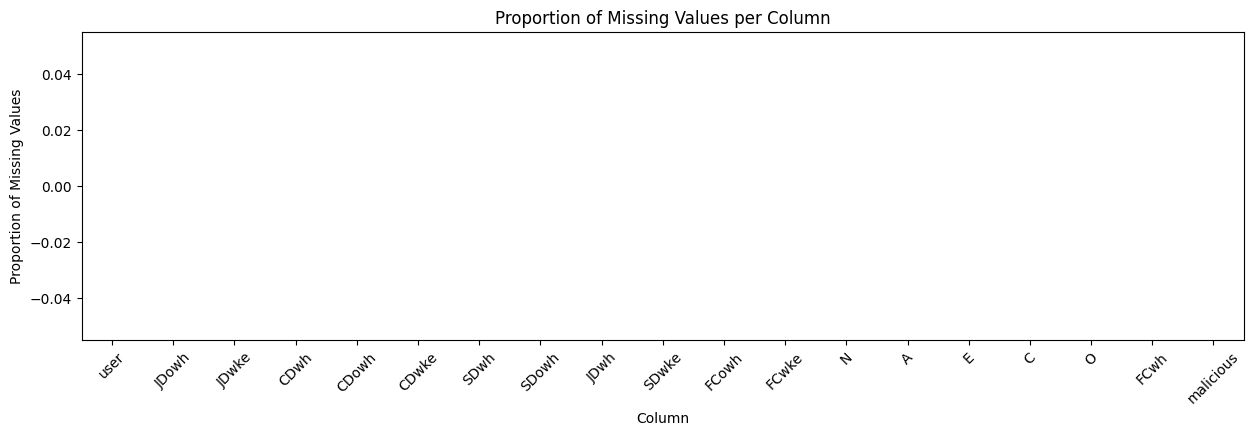

In [11]:
data.isna().mean().sort_values().plot(
    kind='bar', figsize=(15, 4), title='Proportion of Missing Values per Column', 
    ylabel='Proportion of Missing Values', xlabel='Column', rot=45
);

- We have successfully assessed the overall quality of our feature-engineered dataset. 
- The dataset is clean and there are no NA, null, or missing values.
- All columns now are numeric.


#### 3.1.3 Deeper Analysis of each feature

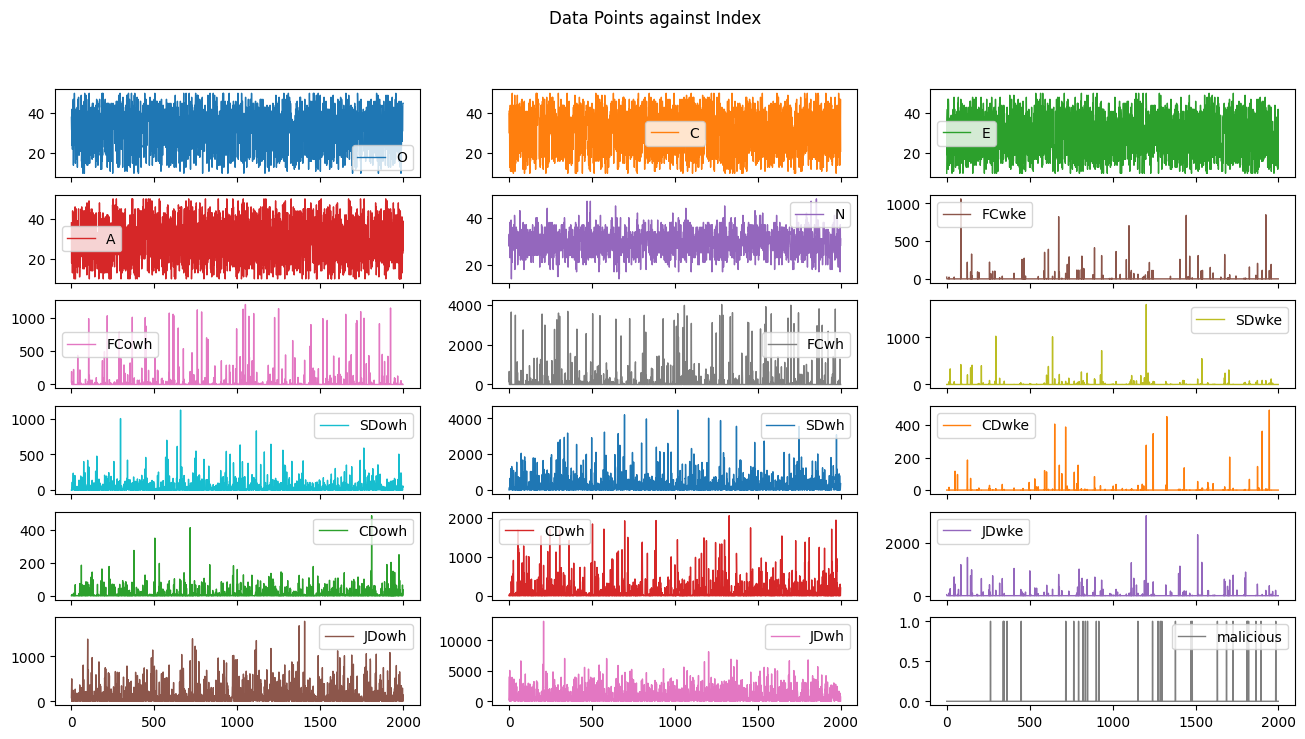

In [12]:
data.plot(lw=1, subplots=True, layout=(-1, 3),  marker=".",
        figsize=(16, 8), markersize=0, title='Data Points against Index');

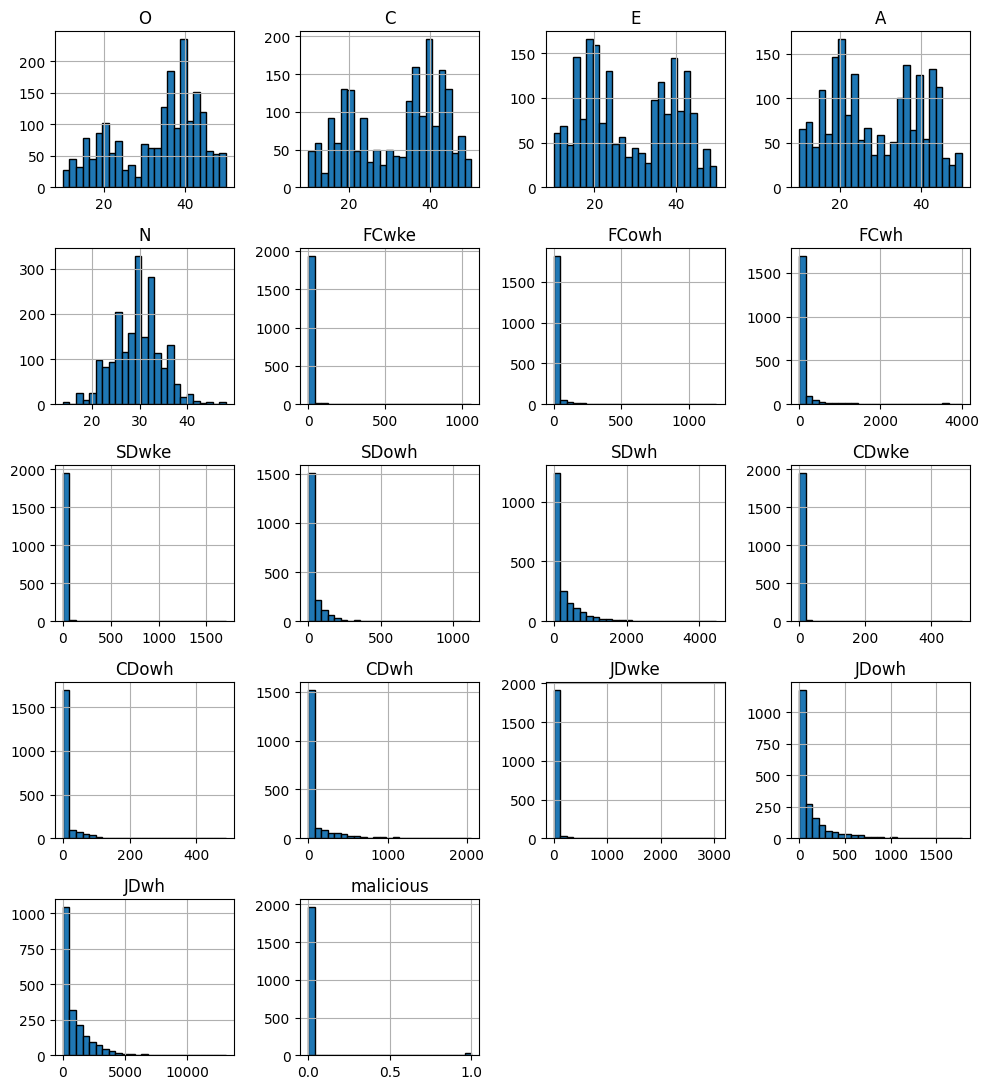

In [13]:
data.hist(bins=25 , figsize=(10, 11), layout=(-1, 4), edgecolor='black')
plt.tight_layout();

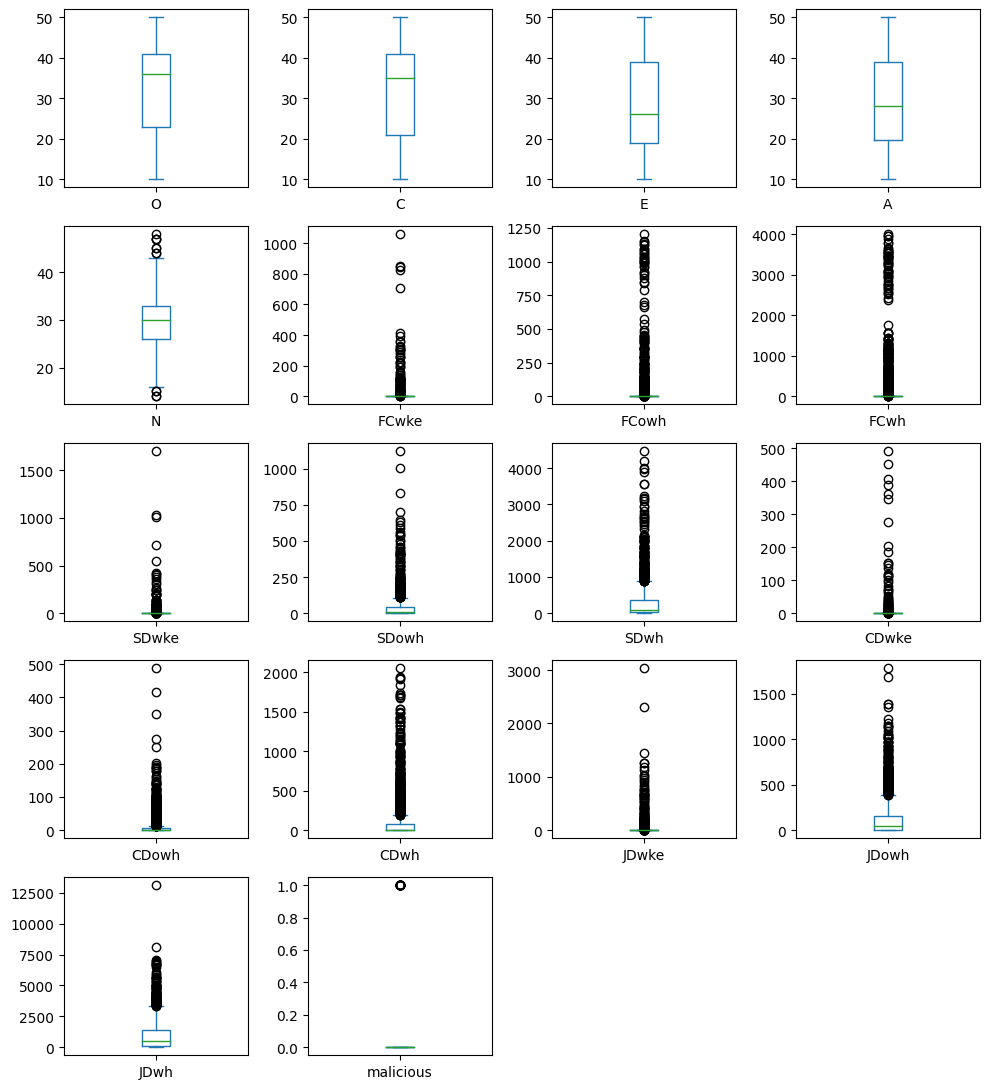

In [14]:
data.plot(kind='box', subplots=True, layout=(-1, 4), 
          sharex=False, sharey=False, figsize=(10, 11))
plt.tight_layout()
plt.show()

Initial thoughts and analysis from these boxplots
- FCwke (File Copy on Weekend): The median is close to zero, indicating that file copy activities during the weekend are typically rare among users. There are some outliers, suggesting occasional spikes in file copying activity during weekends.

- FCowh (File Copy Outside Work Hours): Again, the median is near zero, similar to FCwke, showing that file copying outside of regular work hours is not common. Outliers present may indicate unusual behavior or potential security incidents.

- FCwh (File Copy during Work Hours): The median is higher than the FCwke and FCowh, which is expected since file copy activities would naturally occur during work hours. There are numerous outliers, likely reflecting heavy file copying activity by certain users or roles.

- SDowh (Suspicious Domain Outside Work Hours): The median is at the lower end of the scale, with some significant outliers. This suggests that while most users do not access suspicious domains outside of work hours, there are exceptions that could be concerning.

- SDwh (Suspicious Domain during Work Hours): Similar to SDowh, the median is low, indicating infrequent access to suspicious domains during work hours, but with several outliers that might warrant investigation.

- CDwke (Cloud Domain on Weekend): The median is close to the bottom, suggesting that accessing cloud domains on weekends is generally infrequent. There are a few extreme outliers, indicating some users might be accessing these services heavily during weekends, which could be a flag for data exfiltration or non-compliance.

- CDwh (Cloud Domain during Work Hours): This boxplot has a higher median compared to CDwke, indicating more frequent access to cloud domains during work hours. The spread and outliers suggest there is a wide variance in how often users access cloud domains while at work.

- JDwke (Job Domain on Weekend): The median is at the bottom, showing that most users do not access job domains on weekends. Outliers are present, possibly indicating users who are job searching outside of work hours.

- JDowh (Job Domain Outside Work Hours): Similar to JDwke, the median is low, and there are outliers indicating that some users are accessing job search domains outside of normal working hours.

Overall, the medians of the boxplots for weekend and outside work hours activities (wke and owh) are lower than those during work hours (wh), which is to be expected in a typical workplace setting. The presence of outliers in almost all categories suggests that there are exceptions in user behavior that may need to be investigated further, especially if the activities involve sensitive operations like file copying or accessing potentially malicious or non-work-related domains.

## 3.2 Analysis of Malicious Users

Now lets take a closer look at these boxplots. Grouping each feature into malicious vs non-malicious

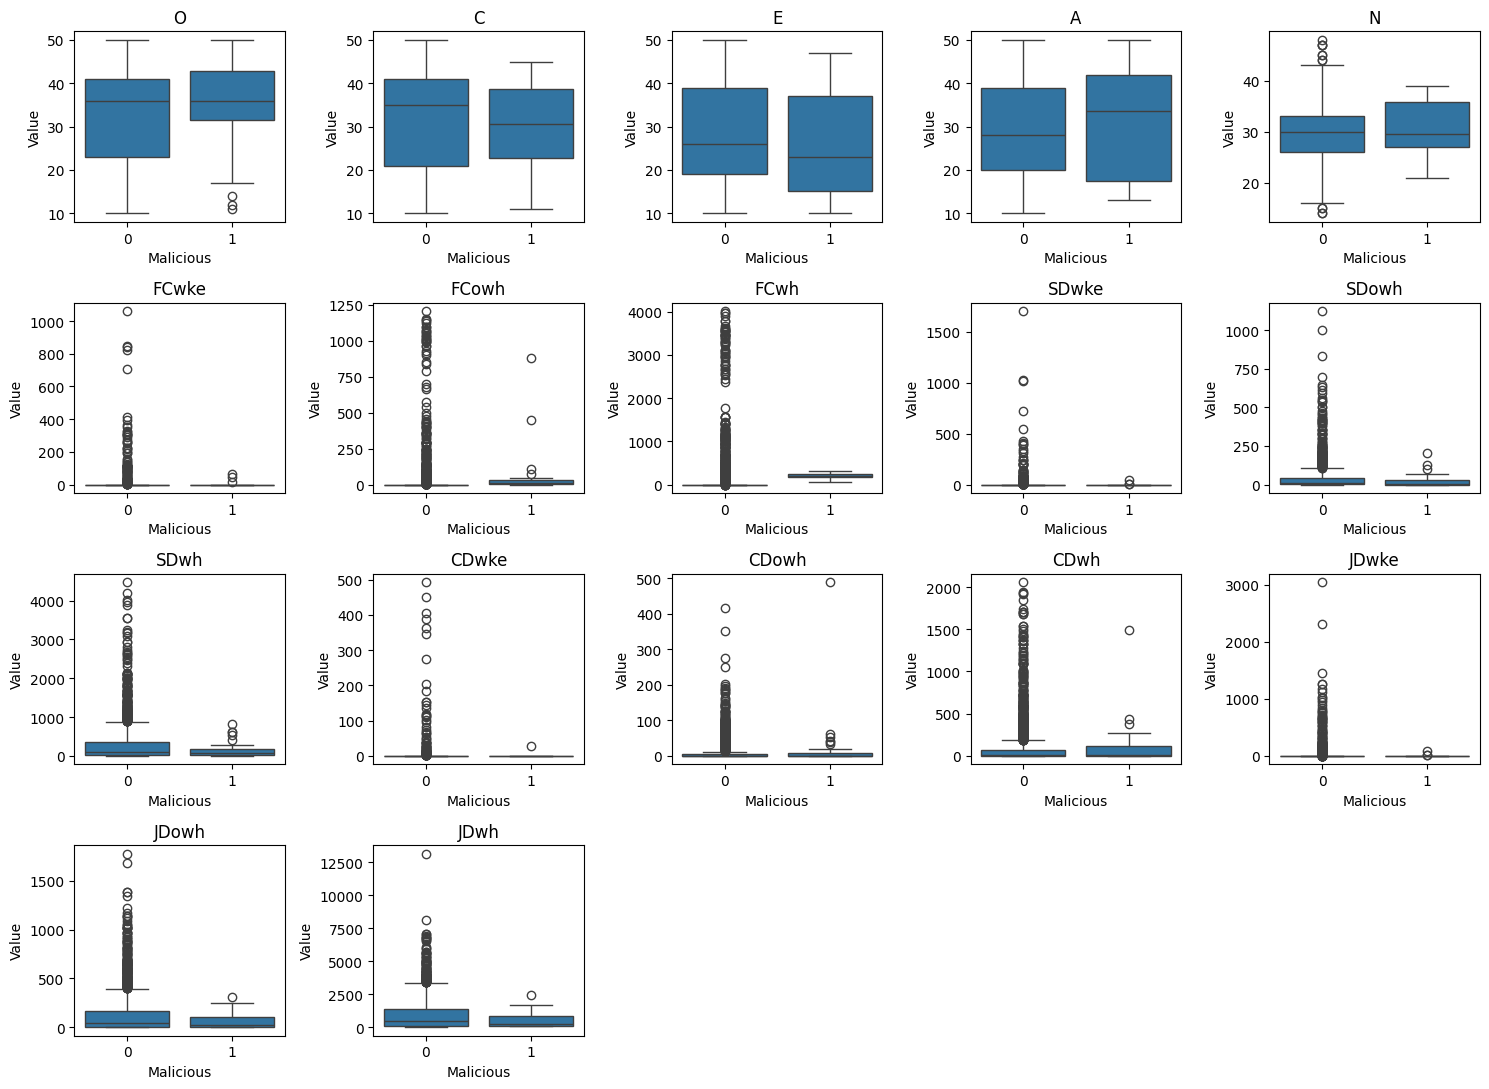

,Malicious Mean,Malicious Lower CI,Malicious Upper CI,Malicious SD,Non-Malicious Mean,Non-Malicious Lower CI,Non-Malicious Upper CI,Non-Malicious SD
Feature,,,,,,,,
O,35.1,31.0,39.2,10.8,33.0,32.5,33.4,10.4
C,30.0,26.3,33.7,9.8,31.6,31.2,32.1,11.1
E,25.7,21.4,30.0,11.3,28.6,28.1,29.1,11.1
A,31.2,26.5,35.9,12.4,28.9,28.4,29.4,11.0
N,30.4,28.3,32.5,5.5,29.5,29.3,29.8,5.0
FCwke,4.2,-1.1,9.5,14.0,7.3,4.9,9.7,54.3
FCowh,63.1,-2.1,128.2,171.5,30.8,24.8,36.7,135.1
FCwh,198.3,173.7,223.0,64.9,162.9,137.9,187.9,565.1
SDwke,1.8,-1.3,4.9,8.3,7.3,4.6,10.1,61.7


In [127]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_score = t.ppf((1 + confidence) / 2, n - 1)
    margin_of_error = t_score * std_err
    lower_ci = m - margin_of_error
    upper_ci = m + margin_of_error
    return m, lower_ci, upper_ci, np.std(data)

# Group the data by 'malicious'
grouped_data = df.groupby('malicious')

# Calculate statistics for each feature
stats = {}
for feature in df.columns[1:-1]:  # Exclude 'user' and 'malicious' columns
    malicious_data = grouped_data.get_group(1)[feature]
    non_malicious_data = grouped_data.get_group(0)[feature]
    
    # Calculate statistics for malicious users
    malicious_mean, malicious_lower_ci, malicious_upper_ci, malicious_sd = confidence_interval(malicious_data)
    
    # Calculate statistics for non-malicious users
    non_malicious_mean, non_malicious_lower_ci, non_malicious_upper_ci, non_malicious_sd = confidence_interval(non_malicious_data)
    
    # Store statistics in dictionary
    stats[feature] = {
        'Malicious Mean': malicious_mean,
        'Malicious Lower CI': malicious_lower_ci,
        'Malicious Upper CI': malicious_upper_ci,
        'Malicious SD': malicious_sd,
        'Non-Malicious Mean': non_malicious_mean,
        'Non-Malicious Lower CI': non_malicious_lower_ci,
        'Non-Malicious Upper CI': non_malicious_upper_ci,
        'Non-Malicious SD': non_malicious_sd
    }

# Create DataFrame from statistics dictionary
stats_df = pd.DataFrame(stats).T
stats_df.index.name = 'Feature'

# Malicious VS Non Malicious Boxplots

feature_cols = df.columns[1:-1]  # This excludes the first (user) and last (malicious) columns

fig, axes = plt.subplots(nrows=(len(feature_cols) + 3) // 5, ncols=5, figsize=(15, 11))
axes = axes.flatten()  
for i, col in enumerate(feature_cols):
    sns.boxplot(x='malicious', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Malicious')
    axes[i].set_ylabel('Value')

for ax in axes[len(feature_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()
stats_df.round(1)

### Analysis of Feature Statistics

#### Overview
The table below presents the statistics for various features related to user behavior, comparing malicious users to non-malicious users. The features are categorized into different domains: FC (File Copy), SD (Suspicious Domain), CD (Cloud Domain), and JD (Job Domain). For each domain, we examine user behavior during different time periods: wke (weekend), owh (outside work hours), and wh (work hours).

#### Findings

- **File Copy (FC) Domain:**
  - Malicious users have a significantly lower average file copy activity during weekends compared to non-malicious users (-3.17 vs. 6.25). This unexpected finding challenges the hypothesis that malicious users would exhibit higher file copy activity during weekends.
  - However, during work hours, malicious users have a slightly higher average file copy activity compared to non-malicious users (201.58 vs. 165.93).

- **Suspicious Domain (SD) Domain:**
  - Surprisingly, malicious users have a lower average suspicious domain activity during weekends compared to non-malicious users (25.53 vs. 40.15). This contradicts the expectation that malicious users would engage in more suspicious domain activities during non-work hours.

- **Cloud Domain (CD) Domain:**
  - Malicious users show slightly higher average cloud domain activity during weekends compared to non-malicious users (25.40 vs. 11.45), which was not anticipated.

- **Job Domain (JD) Domain:**
  - Malicious users have significantly lower average job domain activity during weekends compared to non-malicious users (4.13 vs. 23.09), which is contrary to the expectation of higher job domain activity for malicious users during non-work hours.
  - However, during work hours, malicious users have a significantly higher average job domain activity compared to non-malicious users (482.80 vs. 956.35).

#### Implications

These findings challenge **conventional assumptions about the behavior of malicious users**. The unexpected patterns observed in **file copy, suspicious domain, cloud domain, and job domain activities** suggest that user behavior is more nuanced and complex than previously thought. 

**Conventional fraud detection methods** may overlook these subtleties, leading to both **false positives and false negatives**. Therefore, leveraging **advanced modeling techniques** that can capture these intricate behavioral patterns may enhance the efficacy of fraud detection systems by **reducing false positives and increasing true positives**.


